In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import collections
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load data 

In [3]:
df = pd.read_csv("subventions-accordees-et-refusees.csv",delimiter = ';')

In [4]:
df.shape

(59130, 10)

In [5]:
df.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteurs d'activités définies par l'association
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [19]:
df.isna().sum()/df.shape[0]

numDoc                     0.000000
anneeBudg                  0.000000
collectivite               0.000000
beneficiaire               0.000355
siret                      0.002706
objet du dossier           0.000000
montant vote               0.000000
direction                  0.000000
Nature de la subvention    0.000000
secteur activite           0.000000
dtype: float64

# Data Vizualisation

In [6]:
#remove the montant voté =0 
#df = df[df["Montant voté"]!=0]

In [7]:
# df.head()

In [8]:
y = df["Montant voté"]

In [9]:
df = df.rename(columns={'Numéro de dossier': 'numDoc', 'Année budgétaire': 'anneeBudg', 'Collectivité':'collectivite', 
                  'Nom Bénéficiaire': 'beneficiaire', 'Numéro Siret': 'siret','Objet du dossier':'objet du dossier',
                  'Montant voté':'montant vote', 'Direction':'direction', 'Nature de la subvention': 'Nature de la subvention'
                  , 'Secteurs d\'activités définies par l\'association': 'secteur activite'})
df.head()

,numDoc,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,montant vote,direction,Nature de la subvention,secteur activite
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [10]:
df['secteur activite'].fillna('None', inplace=True)

The mean of subventions is arround the 30 millions euros.

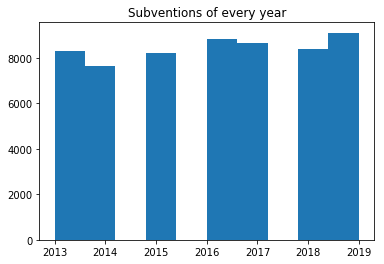

In [11]:
plt.title("Subventions of every year")
plt.hist(df["anneeBudg"])
plt.show()

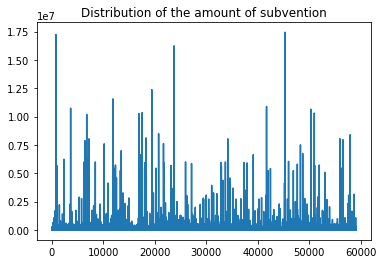

In [12]:
plt.title("Distribution of the amount of subvention")
plt.plot(df["montant vote"])
plt.show()

In [ ]:
plt.title("Collectivité")
plt.hist(df["collectivite"]) 
plt.show()

To get an idea about the the activities of the associations that benefit from subventions, let's extract the activity areas listed in the dataset and visualize the most popular ones.

In [ ]:
secteur_activite = []   #Will contain the activity areas listed in the column "secteur activite"
for i in range(0, len(df),1): 
    secteur_activite.append(df['secteur activite'].iloc[i].split(';')[0])

In [ ]:
dict_secteur_activite = collections.Counter(secteur_activite)

secteurs = list(dict_secteur_activite.keys())
occurence_secteur = list(dict_secteur_activite.values())

percent = 100/sum(occurence_secteur) * np.array(occurence_secteur)
plt.figure(figsize=(12,12))

patches, texts = plt.pie(occurence_secteur, labels=None,
                  shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(secteurs, percent)]

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

The most popular projects proposed by the associations are in the fields of "Culture and arts" and "Education and formation".



Let's visualize a barplot of the top fist associations that gained subventions the most time.

Text(0.5, 1.0, 'The top first associations that gained subventions the most time ')

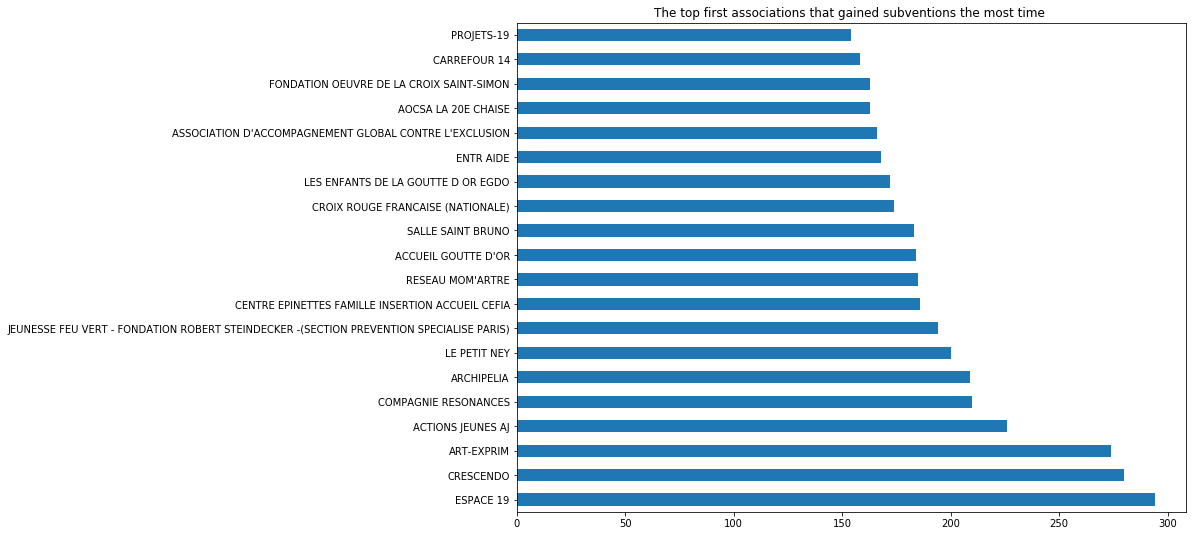

In [76]:
plt.figure(figsize=(12,9))
df['beneficiaire'].value_counts()[:20].plot(kind='barh')
plt.title('The top first associations that gained subventions the most time ')

As we can see in the next plot, the direction "DAC" has voted the bigger total amount of grants (around 600 million euros) followed by "DFPE" (around 400 million euros).

Text(0.5, 1.0, 'Total amount of grants voted by Direction (Main direction of grant)')

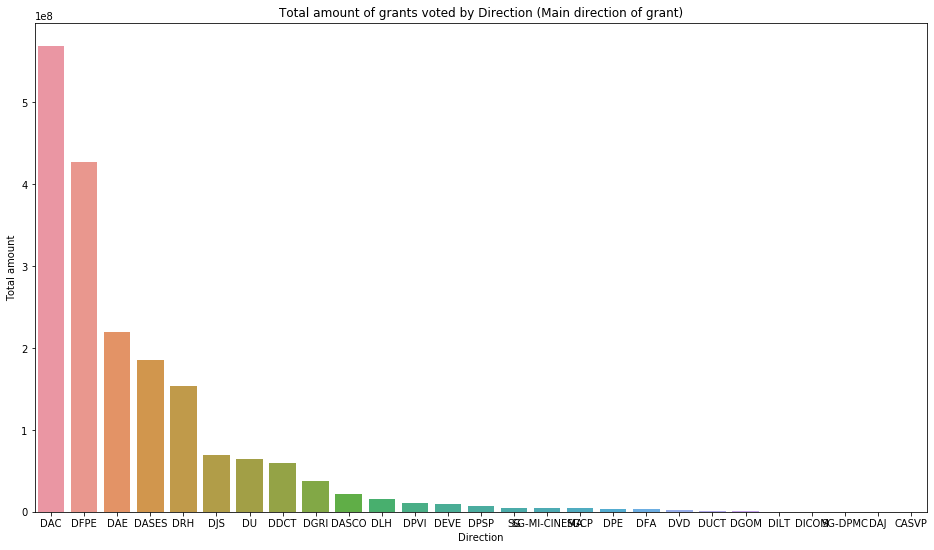

In [77]:
df1 = df[["direction","montant vote"]]
total_montant_by_direction = df1.groupby("direction")['montant vote'].apply(sum)
sorted_montant_by_direction = dict(sorted(dict(total_montant_by_direction).items(),
                                     key=lambda item: item[1], reverse=True))

directions = list(sorted_montant_by_direction.keys())
montants = list(sorted_montant_by_direction.values())

plt.figure(figsize=(16,9))
sns.barplot(x=directions, y=montants, orient='v')
plt.xlabel('Direction')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by Direction (Main direction of grant)')



Text(0.5, 1.0, 'Total amount of grants voted by fiscal year')

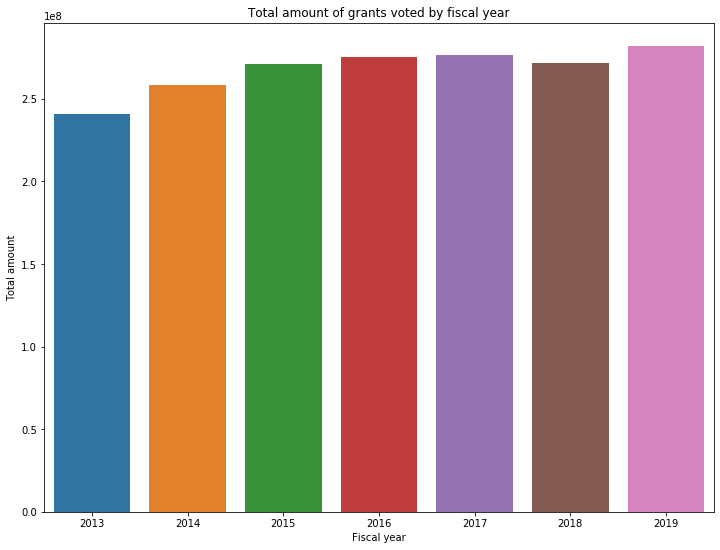

In [78]:
df1 = df[["anneeBudg","montant vote"]]
total_montant_by_annee = df1.groupby("anneeBudg")['montant vote'].apply(sum)
sorted_montant_by_annee = dict(sorted(dict(total_montant_by_annee).items(),
                                     key=lambda item: item[1], reverse=True))

annee = list(sorted_montant_by_annee.keys())
montants = list(sorted_montant_by_annee.values())

plt.figure(figsize=(12,9))
sns.barplot(x=annee, y=montants, orient='v')
plt.xlabel('Fiscal year')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by fiscal year')

The total amount of grants voted is increasing every year.

In [79]:
for c in df.columns: 
    df[c] = df[c].astype("category")  
    df[c].fillna(df[c].mode(),inplace=True)
    df[c] = df[c].cat.codes.values
  

In [80]:
#data after encoding 
df.head()

,numDoc,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,montant vote,direction,Nature de la subvention,secteur activite
0,39917,4,1,6957,2341,14467,0,1,2,145
1,36384,4,1,6957,2341,35435,1213,1,0,145
2,34037,4,1,6962,6071,11689,478,6,3,190
3,34482,4,1,7049,3161,35324,0,1,2,209
4,35784,4,1,7063,4749,13474,208,1,3,209


# General Idea of the model and metric

The main idea of the model is to predict whether the organisation will get subvention and if yes how much.
So the problem will basically be a classification problem with a class for the organization who did not get any subvention and other classes for the amount of the subvention.
To understand better the idea,we suggest this distribution of classes that represent well the data 

<BarContainer object of 6 artists>

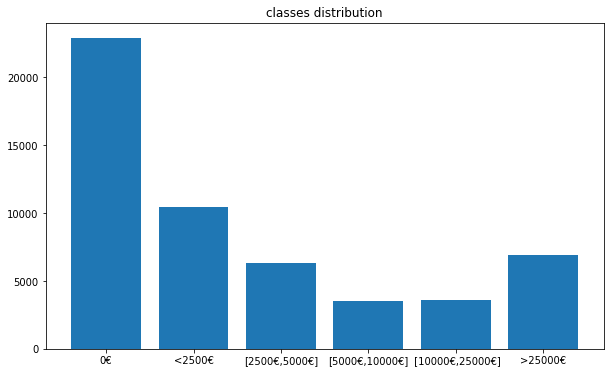

In [81]:
clusters_lengths = list()
clusters_limits = [1,2500,5000,10000,25000,y.max()+1]
y_new = list()
clusters_lengths.append(len(y[y==0]))
for i in range(len(clusters_limits)-1) : 
    a,b = clusters_limits[i],clusters_limits[i+1]
    mask1 = y >a
    mask2 = y< b
    mask = mask1 & mask2
    clusters_lengths.append(len(y[mask]))

for k in y :
    if k==0: 
        y_new.append(0)
    else :
        for i in range(len(clusters_limits)-1) : 
            a,b = clusters_limits[i],clusters_limits[i+1] 
            if (k >=a and k<b) : 
                y_new.append(i+1)

class_names=["0€","<2500€","[2500€,5000€]","[5000€,10000€]"," [10000€,25000€]",">25000€"]   
plt.figure(figsize=(10,6))
plt.title("classes distribution")
plt.bar(class_names,clusters_lengths)

We can see that there is a class imbalance.A solution for this imbalance would be by choosing the best class weights for this problem.We could tune this weights by most of the classifiers offered by sklearn.Example: using RandomForestClassifier
We are going to priorize the model to make less errors when prediction the class 0 euro with the following code: 

In [82]:
n = len(clusters_lengths)
coeff_0_class = 0.8
class_weights = {}
class_weights[0]=coeff_0_class
for i in range(n-1):
    class_weights[i+1]=(1-coeff_0_class)/(n-1)
clf = RandomForestClassifier(n_estimators=256,class_weight=class_weights)

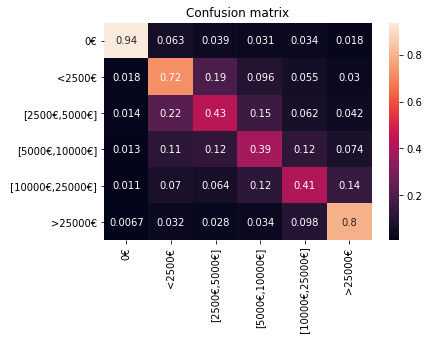

In [83]:
X = df.drop(["montant vote","numDoc"],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y_new,test_size=0.33) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test,y_pred)
CM = CM /CM.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(CM, index = class_names,
                  columns = class_names)
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show() # 

The model is well predicting the priorized class (class 0) with 0.93 accuracy 

## Metric : F1 score 

The F1 score is widely used to evaluate the performance of classification problems and it works as follows: 
(https://en.wikipedia.org/wiki/F1_score) 

${\displaystyle F_{1}=\left({\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}\right)=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" >

In our case we will use a modified F1 score where we give a weight for the F1 score for every class.This choice will give us the possibility to favorize a class over others as follows.

$ Metric(y_{pred},y_{test}) = \alpha_1F1_score(C_1)+\alpha_2F1_score(C_2)+\alpha_3F1_score(C_3)+\alpha_4F1_score(C_4)+\alpha_5F1_score(C_5)+\alpha_6F1_score(C_6)  $

In [128]:
def metric(y_pred,y_test,class_weights) :
    n = len(class_weights)
    score = 0
    for i in range(n):
        score += class_weights[i] * f1_score(y_pred,y_test,average = "weighted",labels=[i])
    return (score)
    

In [129]:
#the class weights for the metric is determined by how much we want our model to predict a well a class compared to others 
#here is an example 
class_weights_metric= [0.4,0.12,0.12,0.12,0.12,0.12]
#for the previous model and with weights (alphas)= class_weights_metric we got this score
metric(y_pred,y_test,class_weights_metric)

0.7098113186983973

# Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [86]:
X = df.drop(["montant vote","numDoc"],axis=1)

In [87]:
X.head()

,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,direction,Nature de la subvention,secteur activite
0,4,1,6957,2341,14467,1,2,145
1,4,1,6957,2341,35435,1,0,145
2,4,1,6962,6071,11689,6,3,190
3,4,1,7049,3161,35324,1,2,209
4,4,1,7063,4749,13474,1,3,209


In [88]:
clf = RandomForestRegressor(n_estimators=64 ) 
#clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=128),n_estimators=64, random_state=np.random.RandomState(1))


In [89]:
# predict montant voté
scores = cross_val_score(clf,X, y, cv=5)
scores

array([0.70841632, 0.6041573 , 0.68470149, 0.77257346, 0.54452561])

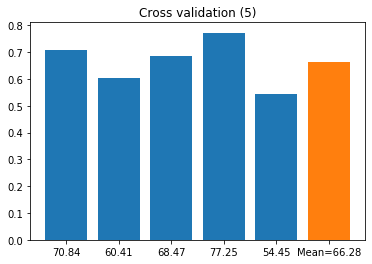

In [90]:
plt.title("Cross validation (5)")
plt.bar([str(i*100)[:5] for i in scores] ,scores)
plt.bar("Mean="+ str(np.mean(scores)*100)[:5],np.mean(scores))
plt.show()

In [91]:
np.mean(scores)

0.6628748380183651

# Viz model

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

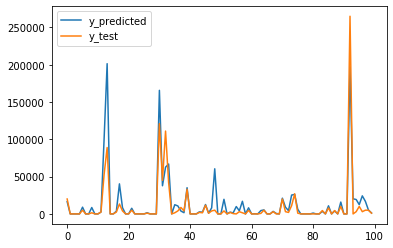

In [93]:
dist = 100
plt.plot(range(dist),y_pred[:dist],label = "y_predicted")
plt.plot(range(dist),y_test[:dist],label ="y_test")
plt.legend()
plt.show()